Prepare a model for glass classification using KNN

Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNC

In [2]:
glass=pd.read_csv('/content/glass.csv')

In [3]:
#to split train and test data
train,test=train_test_split(glass,test_size=0.3,random_state=0)

In [4]:
#KNN
#to find best k value
acc=[]
for i in range(3,50,2):
    neigh=KNC(n_neighbors=i)
    neigh.fit(train.iloc[:,0:9],train.iloc[:,9])
    train_acc=np.mean(neigh.predict(train.iloc[:,0:9])==train.iloc[:,9])
    test_acc=np.mean(neigh.predict(test.iloc[:,0:9])==test.iloc[:,9])
    acc.append([train_acc,test_acc])

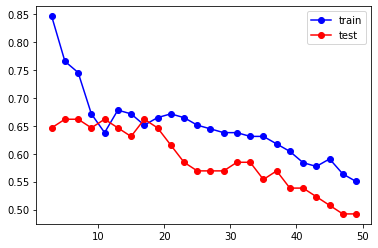

In [5]:
plt.plot(np.arange(3,50,2),[i[0] for i in acc],'bo-')
plt.plot(np.arange(3,50,2),[i[1] for i in acc],'ro-')
plt.legend(['train','test'])

In [16]:
#from plots at k=1 we get best model
#model building at k=1
neigh=KNC(n_neighbors=1)
neigh.fit(train.iloc[:,0:9],train.iloc[:,9])
pred_train=neigh.predict(train.iloc[:,0:9])
train_acc=np.mean(pred_train==train.iloc[:,9])
train_acc

1.0

In [17]:
pred_test=neigh.predict(test.iloc[:,0:9])
test_acc=np.mean(pred_test==test.iloc[:,9])
test_acc

0.6923076923076923